<center><h1>Xie_Qinghui_HW6</h1></center>

Name: Qinghui Xie
<br>
Github Username: qxie44
<br>
USC ID: 7956658480

## 1. Tree-Based Methods

Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### (a) Download the APS Failure data

In [2]:
#na is a string and not actually nan so i have to convert
traindf = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=20, na_values="na")
testdf = pd.read_csv("../data/aps_failure_test_set.csv", skiprows=20, na_values="na")

In [3]:
display(traindf.head())
display(testdf.head(10))

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
5,neg,174,NaN,2.600000e+01,24.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,neg,40202,NaN,6.400000e+02,606.0,0.0,0.0,0.0,0.0,0.0,...,526218.0,239734.0,439556.0,374248.0,169096.0,53658.0,41054.0,320.0,0.0,0.0
7,neg,120278,NaN,2.130706e+09,256.0,0.0,0.0,0.0,0.0,0.0,...,1006722.0,459658.0,876356.0,689532.0,568540.0,500624.0,1006628.0,34820.0,0.0,0.0
8,neg,14592,0.0,2.130706e+09,162.0,0.0,0.0,0.0,0.0,0.0,...,105024.0,57398.0,49152.0,38256.0,243268.0,145144.0,0.0,0.0,0.0,0.0
9,neg,28338,NaN,2.130706e+09,238.0,0.0,0.0,0.0,0.0,0.0,...,357006.0,150056.0,264776.0,239282.0,140548.0,74750.0,32958.0,84.0,0.0,0.0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Some techniques usually used are using mean/mode/median which replaces the value with the mean, mode or media of the features. You may also replace values with KNN which replaces missing values by finding the nearest neighbors in the data. I will be using mean.

In [4]:
#change neg and pos to 0 and 1
traindf['class'] = traindf['class'].replace({'neg': 0, 'pos': 1})
testdf['class'] = testdf['class'].replace({'neg': 0, 'pos': 1})

In [5]:
#fill nan with mean of column
traindf.fillna(traindf.mean(), inplace=True)
testdf.fillna(testdf.mean(), inplace=True)

#### (ii) Calculate the coefficient of variation

In [29]:
#cv is sd/m
cv_values = traindf.std() / traindf.mean()
print(cv_values)

class       7.681210
aa_000      2.450938
ab_000      2.328400
ac_000      2.169767
ad_000    183.847620
             ...    
ee_007      4.962483
ee_008      3.222010
ee_009      5.626979
ef_000     47.124953
eg_000     40.553250
Length: 171, dtype: float64


#### (iii) Plot a correlation matrix

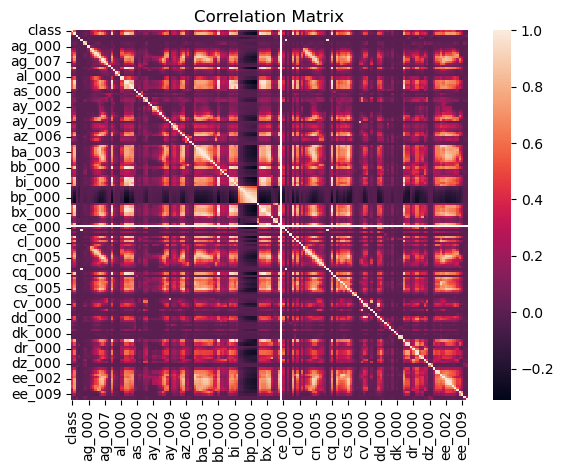

In [7]:
correlation_matrix = traindf.corr()
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix")
plt.show()

#### (iv) Make scatter plots and box plots

In [8]:
count = int(np.sqrt(170))
highest_cv = cv_values.nlargest(count).index.tolist()
print(highest_cv)


['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

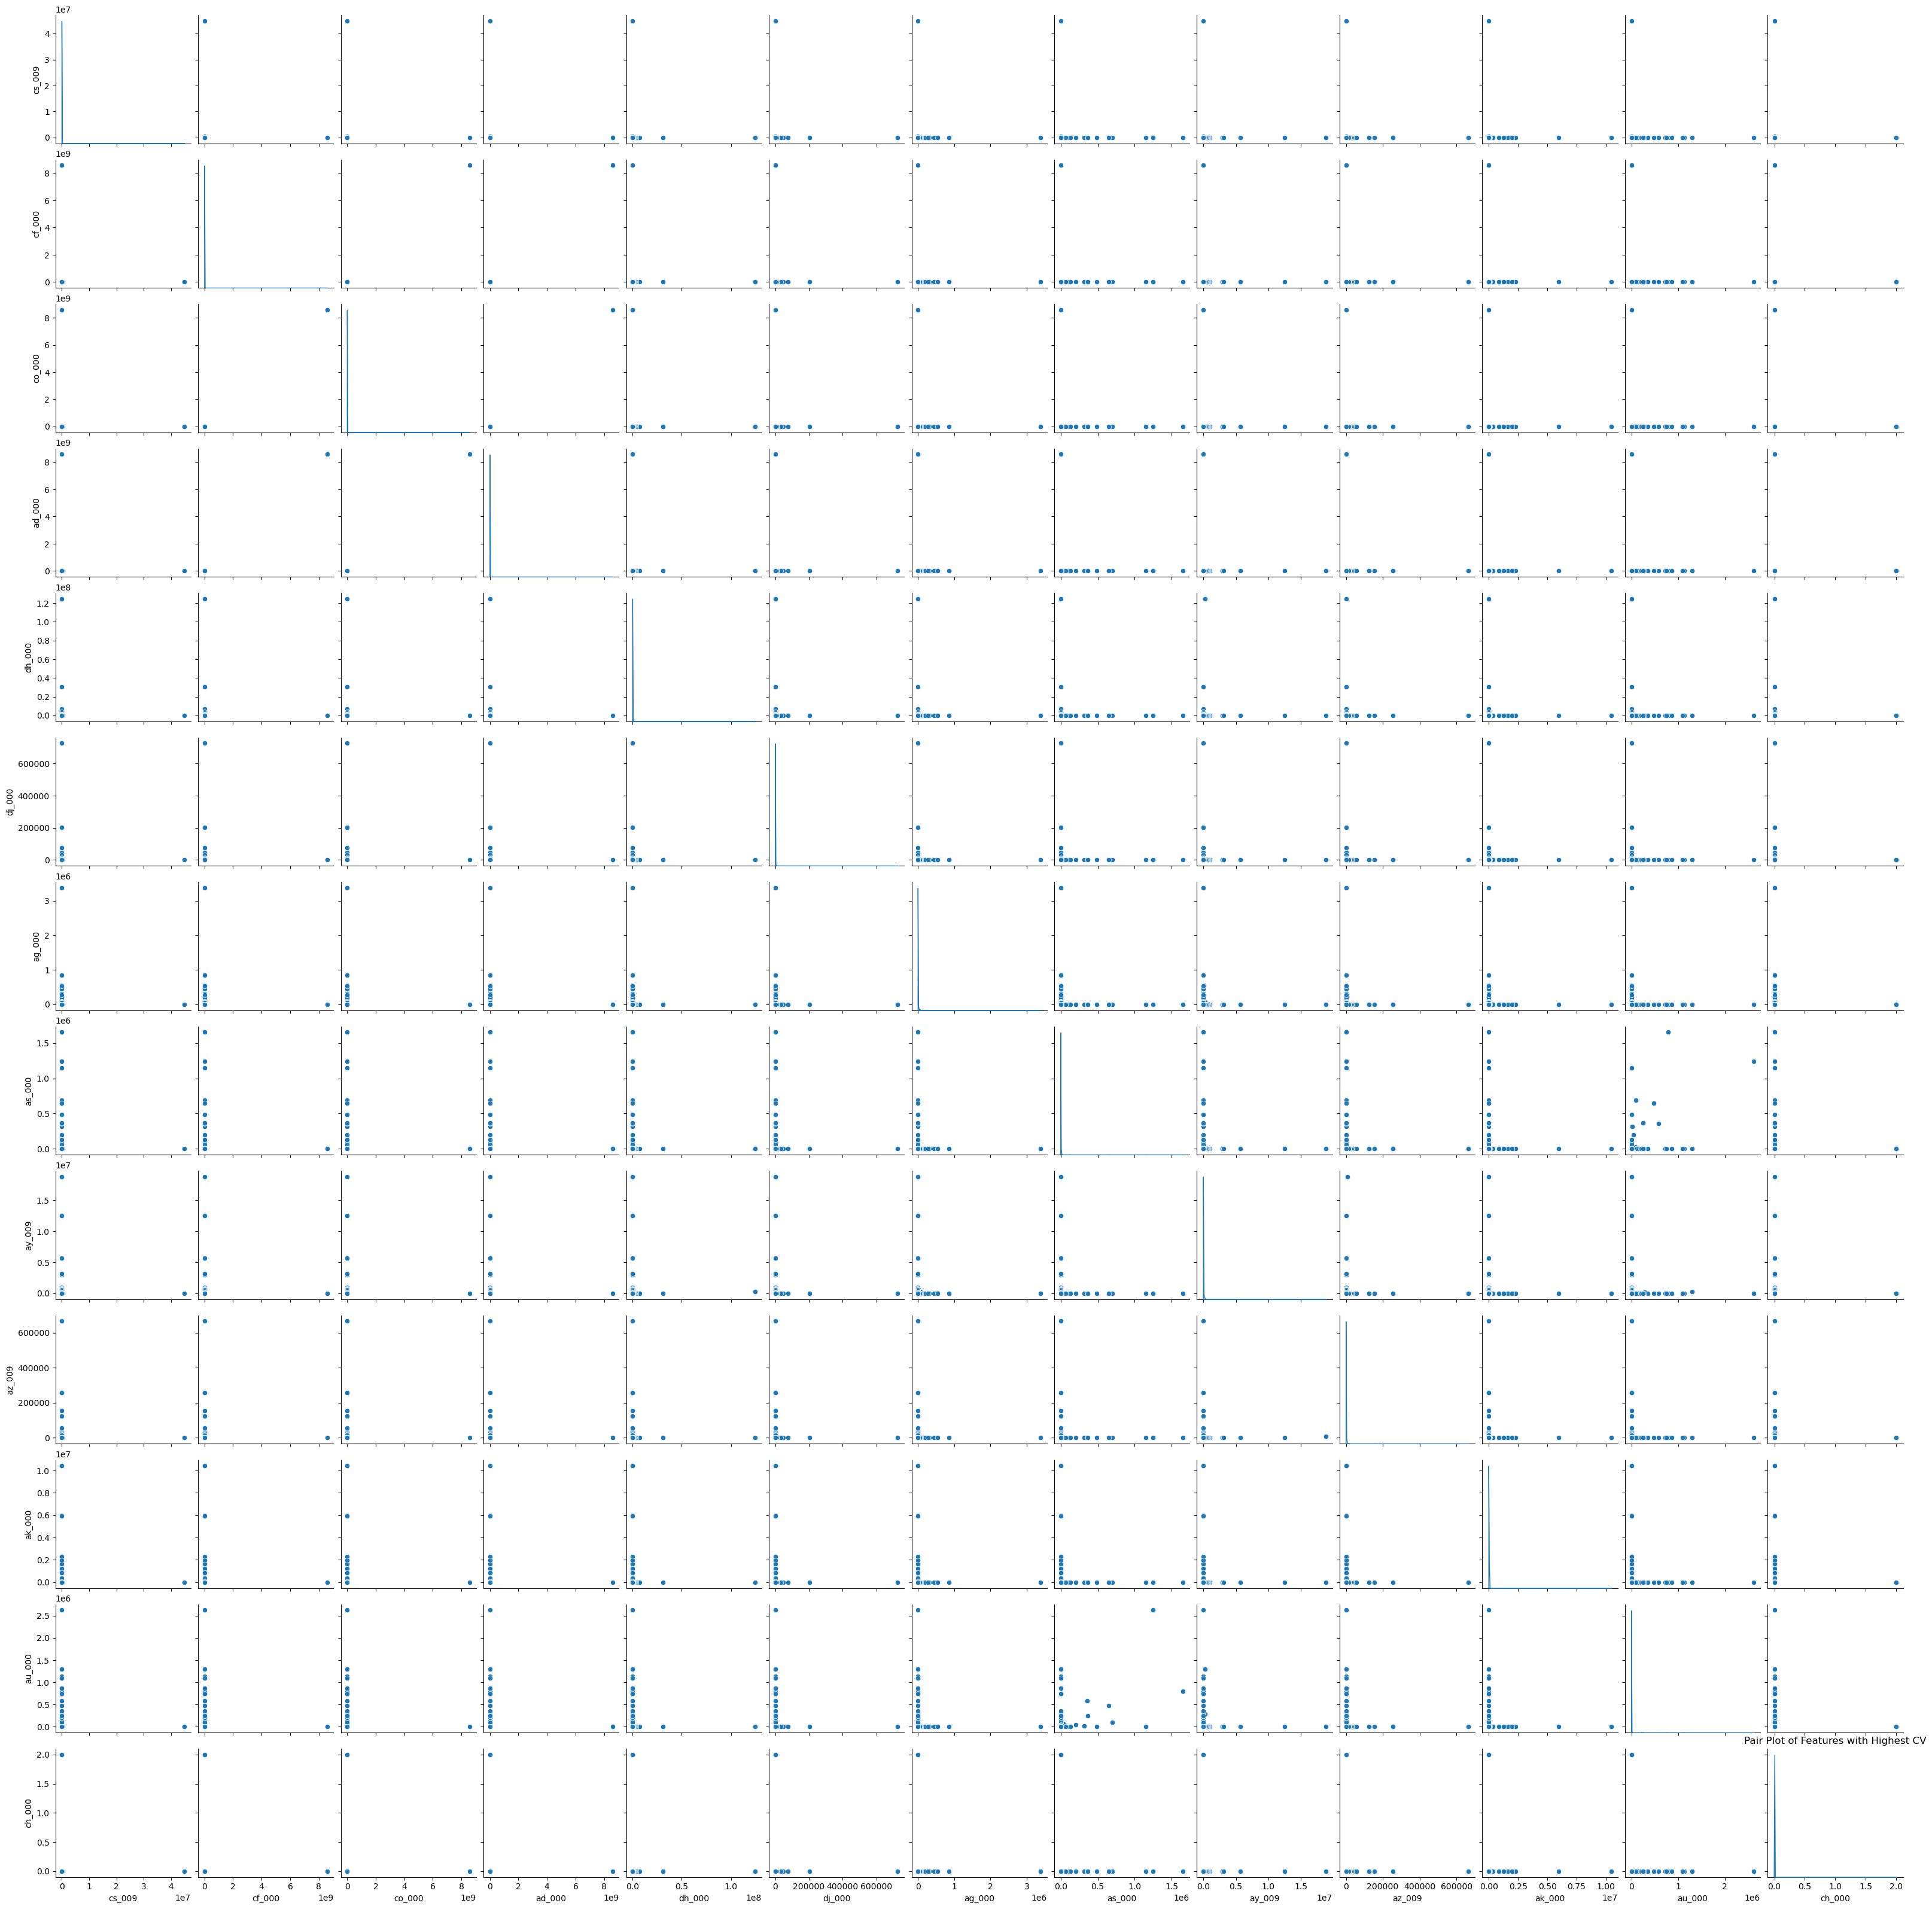

In [22]:
#was timing out, kde allows us to use the density which allows for faster runtime since we're not counting every point
sns.pairplot(traindf[highest_cv], diag_kind="kde")
plt.title('Pair Plot of Features with Highest CV')
plt.show()

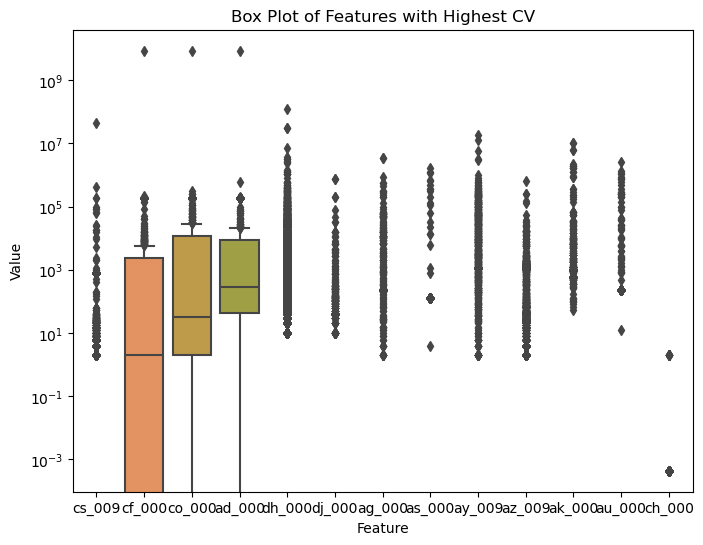

In [25]:
boxplot_df = traindf[highest_cv]
melted_df = boxplot_df.melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.yscale('log')
plt.title('Box Plot of Features with Highest CV')
plt.show()

Cannot draw much conclusion from scatter and boxplot other than the outliers which may affect the mean. 

#### (v) Is this data set imbalanced?

In [11]:
#counting # of 0 and 1 which are neg and pos
train_counts = traindf["class"].value_counts()
test_counts = testdf["class"].value_counts()
print(train_counts)
print(test_counts)


class
0    59000
1     1000
Name: count, dtype: int64
class
0    15625
1      375
Name: count, dtype: int64


There is imbalance in train and test. 

### (c) Train a random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

In [31]:
#train and test
X_train = traindf.drop(columns=["class"])
y_train = traindf["class"]
X_test = testdf.drop(columns=["class"])
y_test = testdf["class"]

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=44)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#cm
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Train CM:")
print(train_cm)
print("\nTest CM:")
print(test_cm)

Train CM:
[[59000     0]
 [    0  1000]]

Test CM:
[[15608    17]
 [  104   271]]


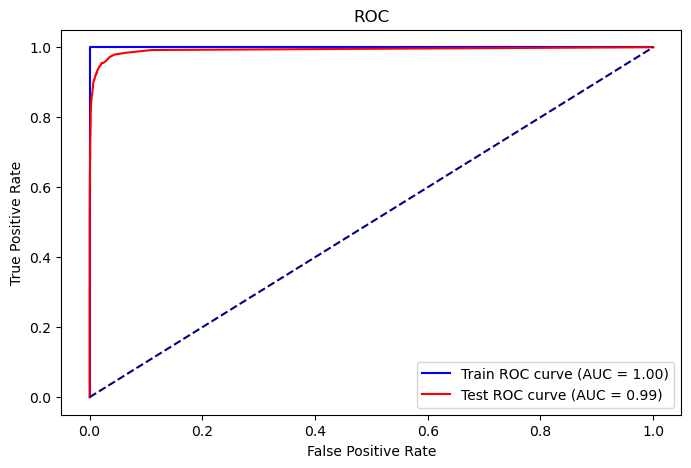

In [19]:
train_fpr, train_tpr, _ = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
test_fpr, test_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)
plt.figure(figsize=(8, 5))
plt.plot(train_fpr, train_tpr, color='blue', label=f'Train ROC curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', label=f'Test ROC curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC')
plt.show()

In [32]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("train accuracy:", train_accuracy, "test accuracy:", test_accuracy)
oob_error = 1 - rf.oob_score_
print("Out-of-Bag Error: ", oob_error)
#oob error is smaller than test error

train accuracy: 1.0 test accuracy: 0.9924375
Out-of-Bag Error:  0.005816666666666692


### (d) Research class imbalance in random forest

Some techniques include adding weights to the classes. A higher weight for the smaller class and a lower weight for the bigger class. Another would be oversampling to smaller class or downsampling the higher class. I will use the class weights. 

In [35]:
#both weights are balance so it would have equal ratio
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=44)
rf.fit(X_train, y_train)

train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

train_conf_matrix = confusion_matrix(y_train, train_preds)
test_conf_matrix = confusion_matrix(y_test, test_preds)

train_fpr, train_tpr, _ = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
test_fpr, test_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)



In [37]:
print("train matrix:", train_conf_matrix)
print("test matrix:", test_conf_matrix)
print("train accuracy:", train_accuracy, "test accuracy:", test_accuracy)
print("comparing to previous results, its a bit lower")

train matrix: [[59000     0]
 [    0  1000]]
test matrix: [[15613    12]
 [  159   216]]
train accuracy: 1.0 test accuracy: 0.9893125
comparing to previous results, its a bit lower


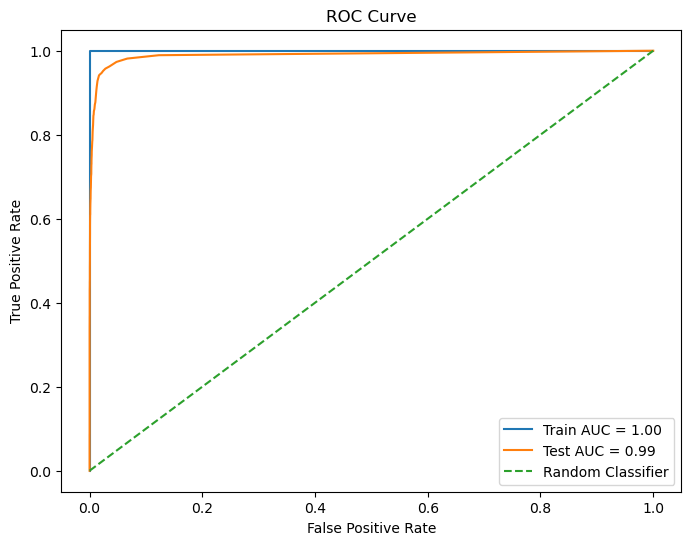

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train AUC = {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### (e) XGBoost and Model Trees

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [42]:
#chatgpt: how to convert to Dmatrix and list of params
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss', 
    'lambda': 1,  # L2 regularization
    'alpha': 0,  # L1 regularization
    'max_depth': 6,  
    'learning_rate': 0.1,  
    'n_estimators': 100  # Number of trees
}

#use 5 fold
param_grid = {'alpha': [0, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                                       eval_metric='logloss'), 
                           param_grid=param_grid, 
                           cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_)

Best alpha: {'alpha': 1.0}


In [44]:
best_a= grid_search.best_params_['alpha']
# use with best alpha
params['alpha'] = best_a

# Train the model with the chosen parameters
model = xgb.train(params, dtrain, num_boost_round=100)

train_preds = model.predict(dtrain)
test_preds = model.predict(dtest)

# 0 or 1 probability
train_preds_binary = (train_preds > 0.5).astype(int)
test_preds_binary = (test_preds > 0.5).astype(int)

#CM
train_conf_matrix = confusion_matrix(y_train, train_preds_binary)
test_conf_matrix = confusion_matrix(y_test, test_preds_binary)

train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)
train_accuracy = accuracy_score(y_train, train_preds_binary)
test_accuracy = accuracy_score(y_test, test_preds_binary)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:02:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
print("train auc:", train_auc, "test auc", test_auc)
print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

train auc: 0.9998330593220339 test auc 0.9952339626666666
Train Confusion Matrix:
[[58999     1]
 [   33   967]]
Test Confusion Matrix:
[[15611    14]
 [   86   289]]
Train Accuracy: 0.9994333333333333
Test Accuracy: 0.99375


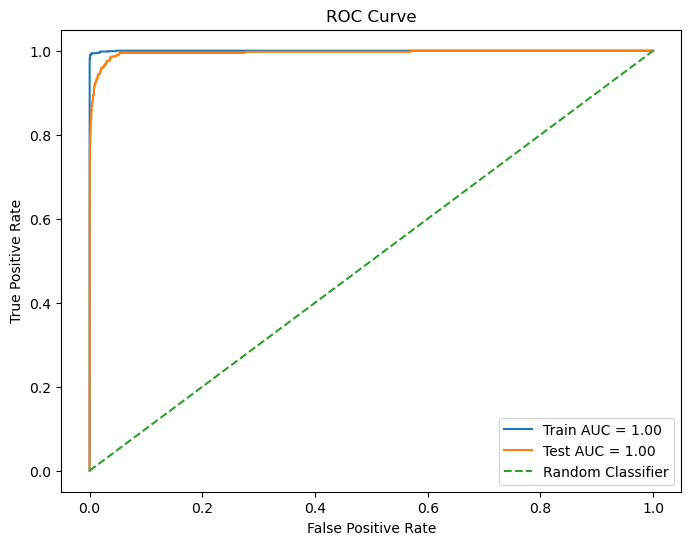

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train AUC = {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### (f) Use SMOTE to pre-process your data

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [63]:
xgb_model = XGBClassifier()
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
xgb_model_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    alpha=1,  # L1 regularization term
    random_state=44
)

pipeline = Pipeline([
    ('smote', smote),
    ('xgb', xgb_model)
])

param_grid = {
    'xgb__alpha': [0, 0.1, 1] 
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
)

In [64]:
# Fit the grid search
grid_search.fit(X_train, y_train)

#best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'xgb__alpha': 1}
Best cross-validation score: 0.9895


In [65]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix (SMOTE + GridSearch):\n", conf_matrix_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
print(f"AUC for training set (SMOTE + GridSearch): {roc_auc_train}")

Training Confusion Matrix (SMOTE + GridSearch):
 [[59000     0]
 [    2   998]]
AUC for training set (SMOTE + GridSearch): 0.9999964237288136


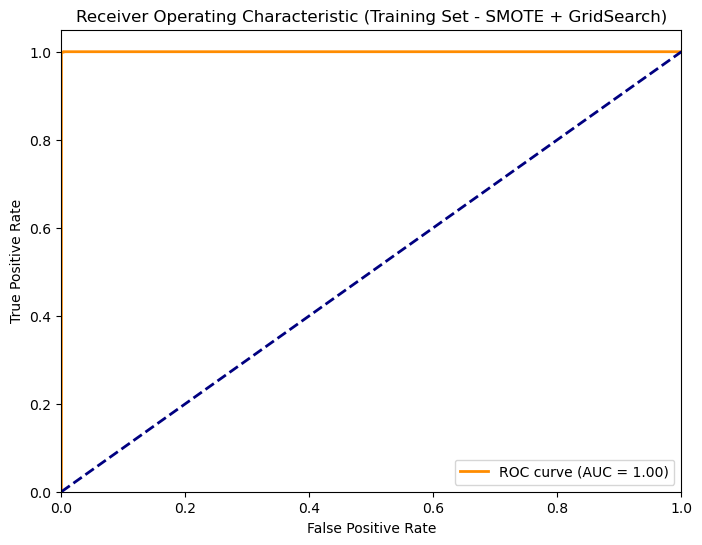

In [66]:

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Training Set - SMOTE + GridSearch)')
plt.legend(loc='lower right')
plt.show()

In [67]:
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix (SMOTE + GridSearch):\n", conf_matrix_test)

# ROC and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)
print(f"AUC for test set (SMOTE + GridSearch): {roc_auc_test}")

Test Confusion Matrix (SMOTE + GridSearch):
 [[15338   287]
 [   49   326]]
AUC for test set (SMOTE + GridSearch): 0.9903220053333333


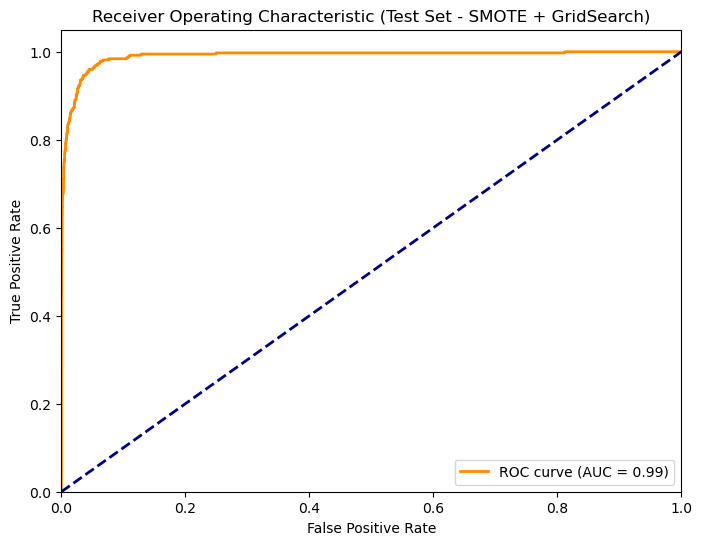

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set - SMOTE + GridSearch)')
plt.legend(loc='lower right')
plt.show()

## 2. ISLR 6.6.3

a. As we increase s from 0, the training RSS will decreased initially and eventually start increasing into a U shape. The penalty forces the coefficients to srhink and reduces RSS, but once s becomes too large, it will underfit causing RSS to increase. 




b. As we increase s from 0, the test RSS will decrease initially, and then eventually start increasing in a U shape. This is because the model is more regularized as s increases, however, like the train, it will start to underfit leading to higher test RSS. 

c. As we increase s from 0, the variance will steadily decrease because regularization penalizes bigger coefficients which reduces the model ability to overfit thus decreasing variance. 

d. As we increase s from 0, the (squared) bias will steadily increase because by shrinking the coefficient, the model become simpler and less flexible which causes increase. 

e. As we increase s from 0, the irreducible error will remain constant because that is the value that is unavoidable and cannot be reduced. The penalization will not affect the error. 

## 3. ISLR 6.6.5

a. Ridge regression optimization problem: 

min β1, β2 \sum_{i=1}^2 (yi - β1xi1 - β2xi2)^2 + λ(β1^2+ β2^2)

(yi - β1xi1 - β2xi2)^2 isthe RSS from the linear model and λ(β1^2+ β2^2) is the regularization term. 
 

b. In this setting, x11 = x12 and x21 = x22 which will result in equal coef for β1 and β2. x1 and x2 are perfectly correlated and in ridge, the coeffificents are penalized equaly so it the regularization term doesn't favor one over another. Since the features are the same and it shrinks the same, β1 and β2 are equal. 

c. lasso optimization problem:
min β1, β2 \sum_{i=1}^2 (yi - β1xi1 - β2xi2)^2 + λ(|β1|+ |β2|)

The first term is RSS and the second term is the L1 regularization term. 


d. In a setting that β1 and β2 are not unique, there are many solutions. In a perfect correlation, β1 or β2 can take any value and other will adjust to maintain the same fit. In lasso, if the regularization term λ is very large, one of the coefficients may shrink to 0.

## 4. ISLR 8.4.5

Majority Vote Approach:
less than 0.5 : false, otherwise true
False = 4, True = 6
This would classifiy as red.

Average Probability Approach:
The average is 0.45 which means the final prediction is green. 

In [70]:
(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6+0.6+0.65+ 0.7+ 0.75)/10

0.45

## 5. ISLR 9.7.3

In [74]:
from sklearn import svm


In [71]:
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
y = np.array([1, 1, 1, 1, -1, -1, -1]) # 1 = red, -1 = blue

Text(0.5, 1.0, 'Observations')

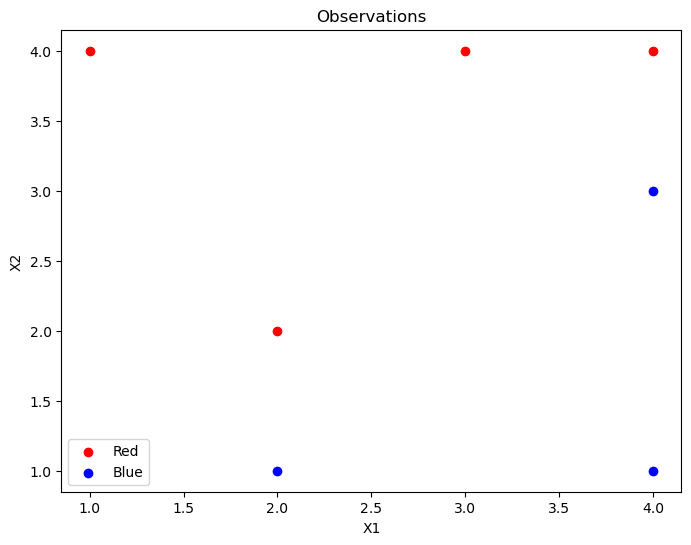

In [73]:
#a
plt.figure(figsize=(8,6))
plt.scatter(X[:4, 0], X[:4, 1], color='red', label='Red')  # Red class
plt.scatter(X[4:, 0], X[4:, 1], color='blue', label='Blue')  # Blue class
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Observations')

Text(0.5, 1.0, 'Optimal Separating Hyperplane with Support Vectors')

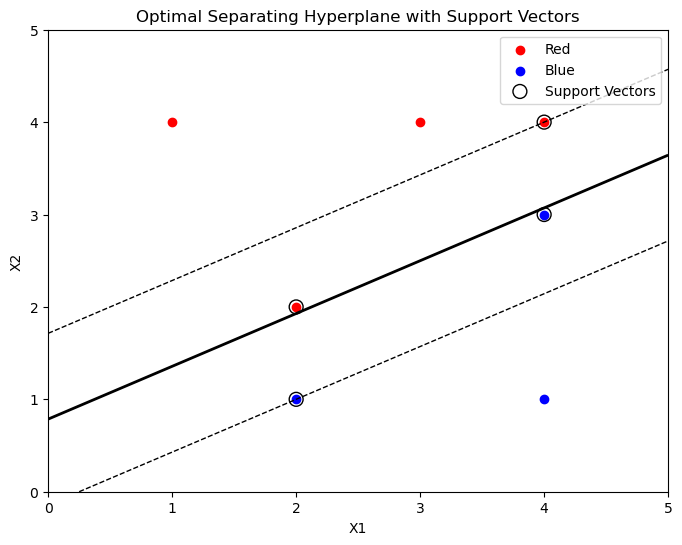

In [76]:
#b
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
#hyperplane equation is w.X + b = 0
w = clf.coef_[0]
b = clf.intercept_[0]  
#chatgpt: how to plot the hyperplace after creating hyperplace equation
xx, yy = np.meshgrid(np.linspace(0, 5, 30), np.linspace(0, 5, 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.scatter(X[:4, 0], X[:4, 1], color='red', label='Red')  # Red class
plt.scatter(X[4:, 0], X[4:, 1], color='blue', label='Blue')  # Blue class
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # Decision boundary
plt.contour(xx, yy, Z, levels=[1], linewidths=1, colors='black', linestyles='dashed')  
plt.contour(xx, yy, Z, levels=[-1], linewidths=1, colors='black', linestyles='dashed') 
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Hyperplane with Support Vectors')

In [88]:
#c
print(f"Equation of hyperplane: β0 + β1*X1 + β2*X2 = 0, > 0 classify to red, otherwise blue")
print(f"β0 = {b}")
print(f"β1 = {w[0]}")
print(f"β2 = {w[1]}")

Equation of hyperplane: β0 + β1*X1 + β2*X2 = 0, > 0 classify to red, otherwise blue
β0 = -0.8461538461538456
β1 = -0.6153846153846159
β2 = 1.0769230769230766


In [78]:
#d
margin = 2 / np.linalg.norm(w)
print(f"Margin: {margin}")

Margin: 1.6124515496597098


In [79]:
#e
print("Support vectors:")
print(clf.support_vectors_)

Support vectors:
[[2. 1.]
 [4. 3.]
 [2. 2.]
 [4. 4.]]


f. The 7th observation is far from the hyperplane separation and will not affect it. All the support vectors are closer to the boundary and so moving this point that is further away won't affect it as much. 

/var/folders/n4/22323b5s04q10jyc3x2l4qz80000gn/T/ipykernel_27753/282411331.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_non_optimal, levels=[0], linewidths=2, colors='green', label='Non-optimal Hyperplane')


Text(0.5, 1.0, 'Non-optimal Hyperplane')

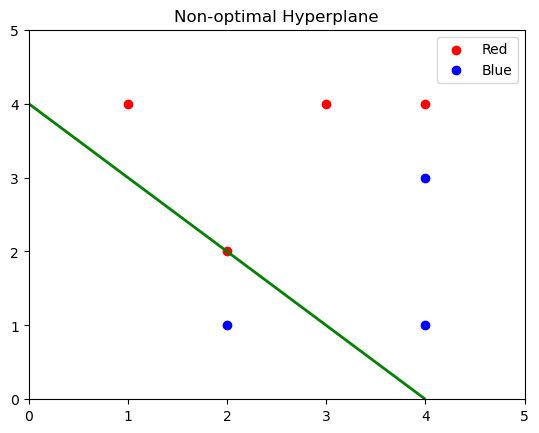

In [89]:
#g
#aribitrary val, neg for b to create a non-optimal
w_non_optimal = np.array([0.5, 0.5])  
b_non_optimal = -2 

plt.scatter(X[:4, 0], X[:4, 1], color='red', label='Red') 
plt.scatter(X[4:, 0], X[4:, 1], color='blue', label='Blue')
Z_non_optimal = w_non_optimal[0] * xx + w_non_optimal[1] * yy + b_non_optimal
plt.contour(xx, yy, Z_non_optimal, levels=[0], linewidths=2, colors='green', label='Non-optimal Hyperplane')
plt.legend()
plt.title('Non-optimal Hyperplane')

Text(0.5, 1.0, 'Non-Separable Data')

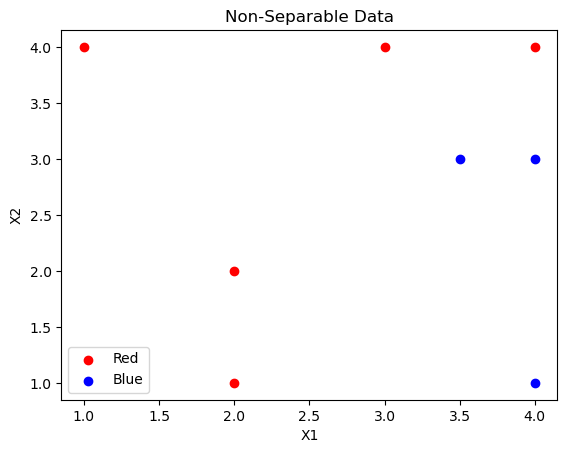

In [90]:
#h
#create new x
new_X = np.array([[3.5, 3]])
X_new = np.vstack([X, new_X])
y_new = np.append(y, 1)
plt.scatter(X_new[:5, 0], X_new[:5, 1], color='red', label='Red')  # Red class
plt.scatter(X_new[5:, 0], X_new[5:, 1], color='blue', label='Blue')  # Blue class
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Non-Separable Data')
